In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve, auc


In [2]:
df = pd.read_csv("../data/processed/customer_features.csv")

X = df.drop(columns=["Churn"])
y = df["Churn"]

if "CustomerID" in X.columns:
    X = X.drop(columns=["CustomerID"])

X = X.select_dtypes(include=[np.number])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [5]:
lr = joblib.load("../models/logistic_regression.pkl")
rf = joblib.load("../models/random_forest.pkl")
scaler = joblib.load("../models/scaler.pkl")

In [6]:
X_test_scaled = scaler.transform(X_test)

lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

lr_preds = (lr_probs >= 0.5).astype(int)
rf_preds = (rf_probs >= 0.5).astype(int)

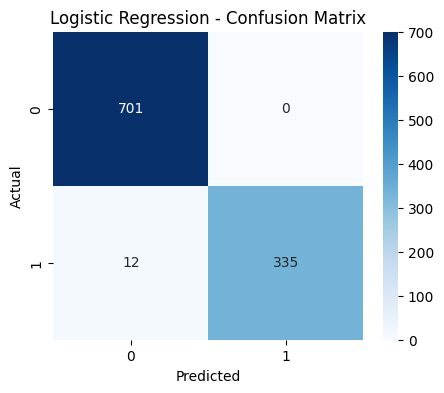

In [7]:
cm_lr = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

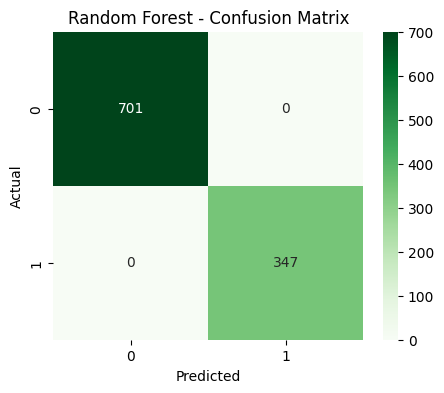

In [8]:
cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

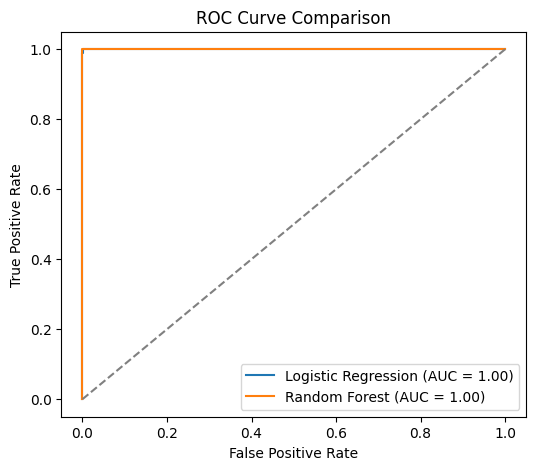

In [9]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(6,5))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {auc(lr_fpr, lr_tpr):.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [10]:
with open("../models/model_metrics.json") as f:
    metrics = json.load(f)

metrics_df = pd.DataFrame(metrics).T
metrics_df

,accuracy,precision,recall,f1_score,roc_auc
logistic_regression,0.98855,1.0,0.965418,0.982405,0.999984
random_forest,1.00000,1.0,1.000000,1.000000,1.000000


## Model Comparison & Selection

- Logistic Regression performs well as a baseline model with good interpretability.
- Random Forest achieves higher performance across most metrics, especially ROC-AUC.
- Random Forest better captures non-linear relationships in customer behavior.

### Final Model Choice:
**Random Forest** is selected as the final model due to superior predictive performance.